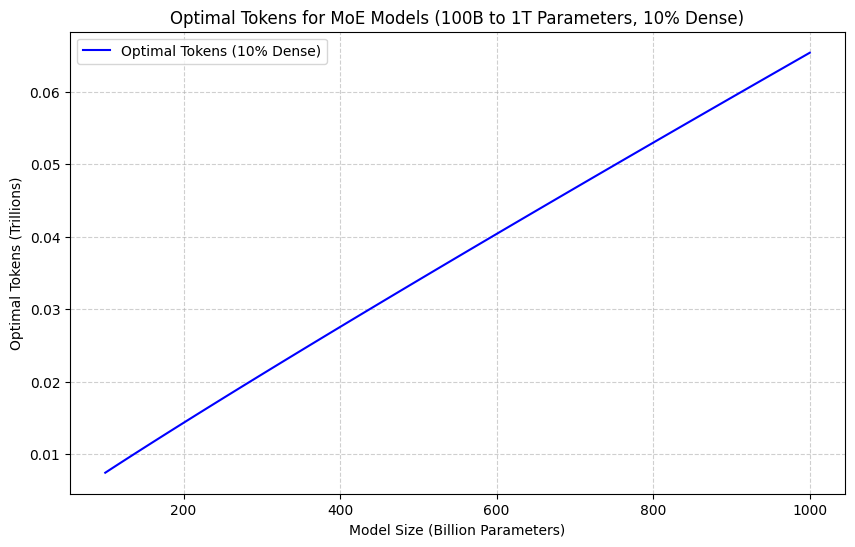

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Constants from the provided formulas
Nc = 5.9e-3
alpha = 0.5305
Dc = 3.2
beta = 0.50

# Model sizes from 100B to 1T parameters
model_sizes = np.linspace(1e11, 1e12, 100)

# Compute C_min using model size and critical batch size assumption
C_min = model_sizes ** (1 / alpha)

# Calculate optimal tokens D_opt
D_opt = Dc * C_min ** beta

# Adjust for 10% dense configuration
D_opt_dense = D_opt * 0.1

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(model_sizes / 1e9, D_opt_dense / 1e12, label='Optimal Tokens (10% Dense)', color='b')
plt.title('Optimal Tokens for MoE Models (100B to 1T Parameters, 10% Dense)')
plt.xlabel('Model Size (Billion Parameters)')
plt.ylabel('Optimal Tokens (Trillions)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()


In [7]:
from utils import convert_to_xt_format, convert_to_billion_format

In [5]:
[convert_to_xt_format(x) for x in D_opt_dense]

['0.0T',
 '0.0T',
 '0.0T',
 '0.0T',
 '0.0T',
 '0.0T',
 '0.0T',
 '0.0T',
 '0.0T',
 '0.0T',
 '0.0T',
 '0.0T',
 '0.0T',
 '0.0T',
 '0.0T',
 '0.0T',
 '0.0T',
 '0.0T',
 '0.0T',
 '0.0T',
 '0.0T',
 '0.0T',
 '0.0T',
 '0.0T',
 '0.0T',
 '0.0T',
 '0.0T',
 '0.0T',
 '0.0T',
 '0.0T',
 '0.0T',
 '0.0T',
 '0.0T',
 '0.0T',
 '0.0T',
 '0.0T',
 '0.0T',
 '0.0T',
 '0.0T',
 '0.0T',
 '0.0T',
 '0.0T',
 '0.0T',
 '0.0T',
 '0.0T',
 '0.0T',
 '0.0T',
 '0.0T',
 '0.0T',
 '0.0T',
 '0.0T',
 '0.0T',
 '0.0T',
 '0.0T',
 '0.0T',
 '0.0T',
 '0.0T',
 '0.0T',
 '0.0T',
 '0.0T',
 '0.0T',
 '0.0T',
 '0.0T',
 '0.0T',
 '0.0T',
 '0.0T',
 '0.0T',
 '0.0T',
 '0.0T',
 '0.0T',
 '0.0T',
 '0.0T',
 '0.1T',
 '0.1T',
 '0.1T',
 '0.1T',
 '0.1T',
 '0.1T',
 '0.1T',
 '0.1T',
 '0.1T',
 '0.1T',
 '0.1T',
 '0.1T',
 '0.1T',
 '0.1T',
 '0.1T',
 '0.1T',
 '0.1T',
 '0.1T',
 '0.1T',
 '0.1T',
 '0.1T',
 '0.1T',
 '0.1T',
 '0.1T',
 '0.1T',
 '0.1T',
 '0.1T',
 '0.1T']

In [8]:
[convert_to_billion_format(x) for x in D_opt_dense]

['7.46B',
 '8.10B',
 '8.73B',
 '9.36B',
 '9.99B',
 '10.62B',
 '11.24B',
 '11.87B',
 '12.49B',
 '13.11B',
 '13.72B',
 '14.34B',
 '14.95B',
 '15.56B',
 '16.17B',
 '16.78B',
 '17.39B',
 '18.00B',
 '18.60B',
 '19.20B',
 '19.81B',
 '20.41B',
 '21.01B',
 '21.61B',
 '22.21B',
 '22.81B',
 '23.40B',
 '24.00B',
 '24.59B',
 '25.19B',
 '25.78B',
 '26.37B',
 '26.96B',
 '27.55B',
 '28.14B',
 '28.73B',
 '29.32B',
 '29.91B',
 '30.50B',
 '31.08B',
 '31.67B',
 '32.25B',
 '32.84B',
 '33.42B',
 '34.00B',
 '34.58B',
 '35.17B',
 '35.75B',
 '36.33B',
 '36.91B',
 '37.49B',
 '38.07B',
 '38.65B',
 '39.22B',
 '39.80B',
 '40.38B',
 '40.95B',
 '41.53B',
 '42.11B',
 '42.68B',
 '43.25B',
 '43.83B',
 '44.40B',
 '44.98B',
 '45.55B',
 '46.12B',
 '46.69B',
 '47.26B',
 '47.83B',
 '48.40B',
 '48.97B',
 '49.54B',
 '50.11B',
 '50.68B',
 '51.25B',
 '51.82B',
 '52.39B',
 '52.95B',
 '53.52B',
 '54.09B',
 '54.65B',
 '55.22B',
 '55.78B',
 '56.35B',
 '56.91B',
 '57.48B',
 '58.04B',
 '58.61B',
 '59.17B',
 '59.73B',
 '60.30B',
 '60

In [31]:
from utils import get_dataset_size_from_model_size, compute_training_flops
from constants import UTILIZED_BFLOAT16_FLOPS, H100_COST_PER_HOUR

In [32]:
get_dataset_size_from_model_size(70*10**9)

1400000000000

In [33]:
reference_dataset_size = 20*10**12
reference_model_size = 70*10**9

In [34]:
reference_total_flops = compute_training_flops(dataset_size=reference_dataset_size, model_size=reference_model_size)

In [35]:
reference_total_h100_seconds = (reference_total_flops // UTILIZED_BFLOAT16_FLOPS)

In [36]:
reference_total_h100_hours = reference_total_h100_seconds / (60*60)

In [37]:
reference_total_h100_hours

4289609.951666667

In [38]:
reference_total_h100_hours*H100_COST_PER_HOUR

8579219.903333334

In [39]:
def compute_dataset_size(compute_budget, model_size, activation_parameters=True):
    """
    Calculate the optimal dataset size (D) given the compute budget (C) and model size (N).

    Args:
        compute_budget (float): The total compute budget C.
        model_size (float): The number of parameters N.
        activation_parameters (bool): Whether the model size represents activated parameters. Default is True.

    Returns:
        float: The computed dataset size D.
    """
    if not activation_parameters:
        raise ValueError("Model size must represent activated parameters.")
    
    # Coefficients from the compute budget formula
    coeff_model = 9.59 * model_size
    coeff_constant = 2.3e8

    # Calculate dataset size
    dataset_size = (compute_budget - coeff_constant) / coeff_model
    
    if dataset_size <= 0:
        raise ValueError("Invalid compute budget or model size resulting in a non-positive dataset size.")
    
    return dataset_size

In [42]:
optimal_dataset_size = compute_dataset_size(reference_total_flops, model_size=100*10**9)

In [43]:
print(f"Optimal dataset size: {result:.2e} tokens")

Optimal dataset size: 8.76e+12 tokens


In [44]:
from utils import convert_to_xt_format

In [45]:
convert_to_xt_format(optimal_dataset_size)

'8.8T'

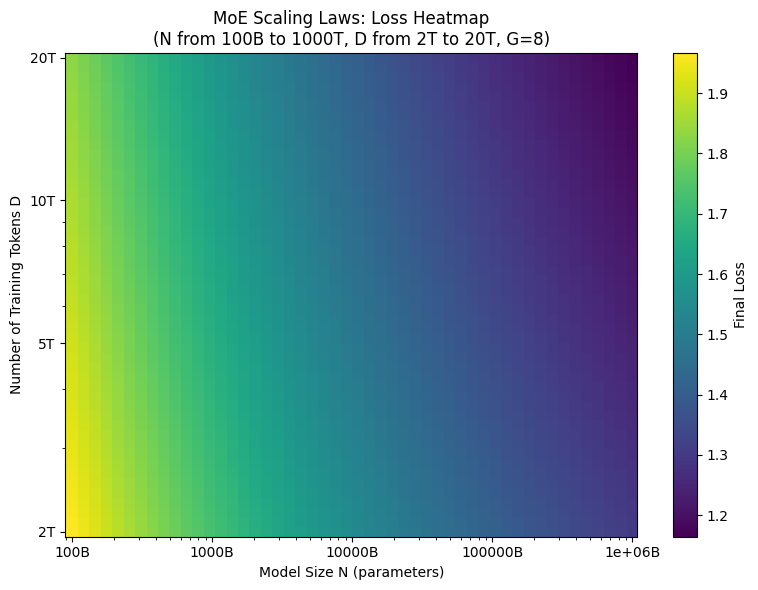

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# Fitted parameters for MoE from the paper
a = 18.1
alpha = 0.115
b = 30.8
beta = 0.147
g_param = 2.1
gamma = 0.58
c = 0.47

# Fixed granularity
G = 8

# Define the loss function
def loss(N, D, G):
    return c + ((g_param / (G**gamma)) + a) / (N**alpha) + b / (D**beta)

# Define the ranges
# N: from 100B (1e11) to 1000T (1e15)
N_vals = np.logspace(11, 15, num=50)   # 50 points from 1e11 to 1e15
# D: from 2T (2e12) to 20T (2e13)
D_vals = np.logspace(np.log10(2e12), np.log10(2e13), num=50)

# Create a 2D grid
N_grid, D_grid = np.meshgrid(N_vals, D_vals)

# Compute the loss for each (N, D) pair
L_grid = loss(N_grid, D_grid, G)

# Plot as a heatmap
fig, ax = plt.subplots(figsize=(8,6))

# We will plot in log-scale for both axes since that's common in scaling law plots
# However, we must be careful about how we display tick labels
im = ax.pcolormesh(N_grid, D_grid, L_grid, shading='auto', cmap='viridis')

# Set log scales on axes
ax.set_xscale('log')
ax.set_yscale('log')

# Add colorbar
cbar = plt.colorbar(im, ax=ax)
cbar.set_label('Final Loss')

# Label axes
ax.set_xlabel('Model Size N (parameters)')
ax.set_ylabel('Number of Training Tokens D')

# Add title
ax.set_title('MoE Scaling Laws: Loss Heatmap\n(N from 100B to 1000T, D from 2T to 20T, G=8)')

# Adjust ticks to be more readable (optional)
ax.set_xticks([1e11, 1e12, 1e13, 1e14, 1e15])
ax.get_xaxis().set_major_formatter(lambda x, pos: f'{x/1e9:g}B')
ax.set_yticks([2e12, 5e12, 1e13, 2e13])
ax.get_yaxis().set_major_formatter(lambda y, pos: f'{y/1e12:g}T')

plt.tight_layout()
plt.show()


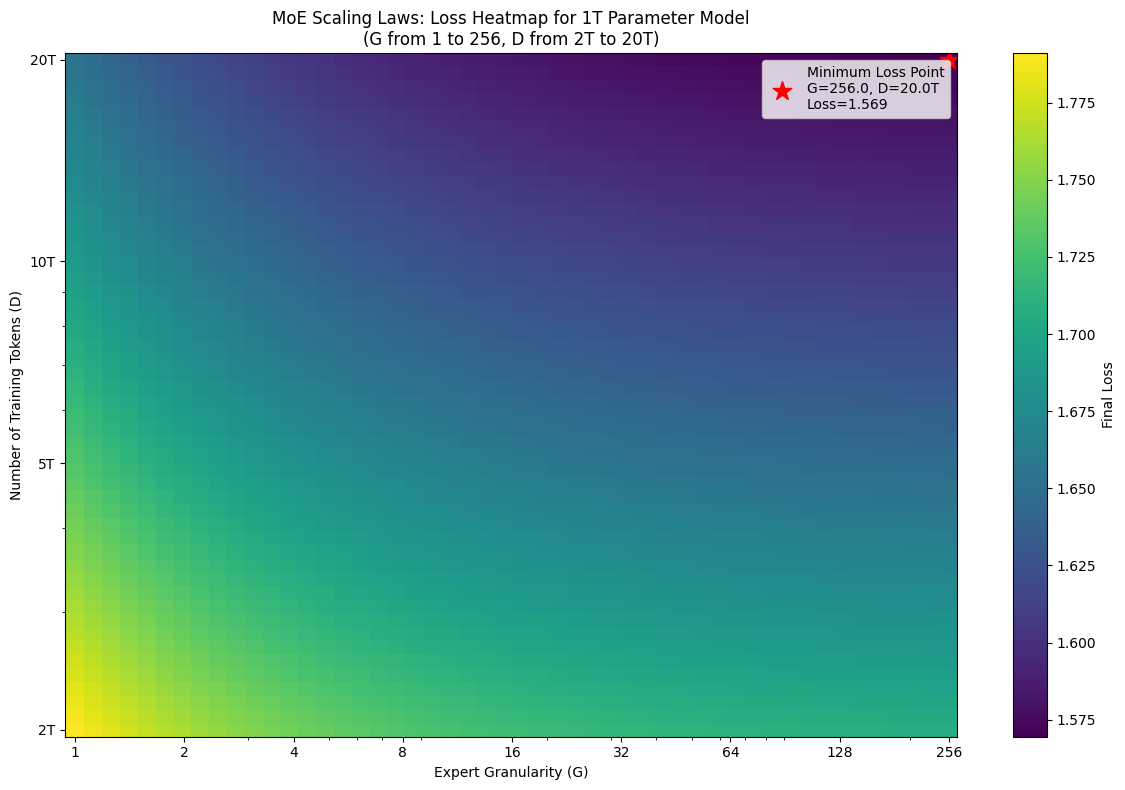


Optimal configuration for 1T parameter model:
Expert Granularity (G): 256.0
Dataset Size (D): 20.0T tokens
Minimum Loss: 1.569


In [48]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# Fitted parameters for MoE from the paper
a = 18.1
alpha = 0.115
b = 30.8
beta = 0.147
g_param = 2.1
gamma = 0.58
c = 0.47

# Fixed model size (1T parameters)
N = 1e12

# Define the loss function
def loss(N, D, G):
    return c + ((g_param / (G**gamma)) + a) / (N**alpha) + b / (D**beta)

# Define the ranges
# D: from 2T (2e12) to 20T (2e13)
D_vals = np.logspace(np.log10(2e12), np.log10(2e13), num=50)
# G: from 1 to 256
G_vals = np.logspace(0, np.log10(256), num=50)

# Create a 2D grid
G_grid, D_grid = np.meshgrid(G_vals, D_vals)

# Compute the loss for each (G, D) pair
L_grid = loss(N, D_grid, G_grid)

# Plot as a heatmap
fig, ax = plt.subplots(figsize=(12,8))

im = ax.pcolormesh(G_grid, D_grid, L_grid, shading='auto', cmap='viridis')

# Set log scales on axes
ax.set_xscale('log')
ax.set_yscale('log')

# Add colorbar
cbar = plt.colorbar(im, ax=ax)
cbar.set_label('Final Loss')

# Label axes
ax.set_xlabel('Expert Granularity (G)')
ax.set_ylabel('Number of Training Tokens (D)')

# Add title
ax.set_title('MoE Scaling Laws: Loss Heatmap for 1T Parameter Model\n(G from 1 to 256, D from 2T to 20T)')

# Adjust ticks to be more readable
ax.set_xticks([1, 2, 4, 8, 16, 32, 64, 128, 256])
ax.get_xaxis().set_major_formatter(lambda x, pos: f'{int(x)}')
ax.set_yticks([2e12, 5e12, 1e13, 2e13])
ax.get_yaxis().set_major_formatter(lambda y, pos: f'{y/1e12:g}T')

# Find the minimum loss and corresponding parameters
min_loss_idx = np.unravel_index(np.argmin(L_grid), L_grid.shape)
min_G = G_grid[min_loss_idx]
min_D = D_grid[min_loss_idx]
min_loss = L_grid[min_loss_idx]

# Mark the minimum point
ax.scatter(min_G, min_D, color='red', marker='*', s=200, label=f'Minimum Loss Point\nG={min_G:.1f}, D={min_D/1e12:.1f}T\nLoss={min_loss:.3f}')
ax.legend()

plt.tight_layout()
plt.show()

# Print optimal values
print(f"\nOptimal configuration for 1T parameter model:")
print(f"Expert Granularity (G): {min_G:.1f}")
print(f"Dataset Size (D): {min_D/1e12:.1f}T tokens")
print(f"Minimum Loss: {min_loss:.3f}")